<a href="https://colab.research.google.com/github/juniorPalomino25/Python/blob/main/EP_DataMining_PalominoLoaJuniorJose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar paquetes

In [259]:
! pip install mglearn;
! apt-get install graphviz
! pip install -U statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importar Librerías

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import seaborn as sns; sns.set_theme()
import sklearn.metrics as metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import graphviz

# Importamos el dataset

In [261]:
datasetOriginal = pd.read_csv("data.csv",delimiter=';')
Dataset1 = datasetOriginal

### Descripción del dataset

In [262]:
Dataset1.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Visualizamos los valores para aplicar los modelos, nos damos cuenta de que son valores categoricos

In [263]:
Dataset1['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

El objetivo es hallar el accuracy para el dropout, por lo tanto, le asignamos el valor de 1 al dropout y a los demás valores les asignamos el valor de 0

In [264]:
Dataset1=Dataset1.replace({'Enrolled':0,'Graduate':0, 'Dropout':1})## equivale al category to numer
Dataset1.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


Utilizamos la función "iloc" en los DataFrames para seleccionar los elementos en base a su ubicación

In [265]:
Dataset1_x = Dataset1.iloc[:,0:Dataset1.columns.size-1].values 
Dataset1_x

array([[ 1.  , 17.  ,  5.  , ..., 10.8 ,  1.4 ,  1.74],
       [ 1.  , 15.  ,  1.  , ..., 13.9 , -0.3 ,  0.79],
       [ 1.  ,  1.  ,  5.  , ..., 10.8 ,  1.4 ,  1.74],
       ...,
       [ 1.  ,  1.  ,  1.  , ..., 13.9 , -0.3 ,  0.79],
       [ 1.  ,  1.  ,  1.  , ...,  9.4 , -0.8 , -3.12],
       [ 1.  , 10.  ,  1.  , ..., 12.7 ,  3.7 , -1.7 ]])

In [266]:
Dataset1_y = Dataset1.iloc[:,Dataset1.columns.size-1].values
Dataset1_y

array([1, 0, 1, ..., 1, 0, 0])

Segmentamos nuestro dataset, 80 para el conjunto de entrenamiento y 20 para el conjunto de prueba

In [267]:
xtrain, xtest, ytrain, ytest = train_test_split(Dataset1_x, Dataset1_y, test_size=0.20, random_state=42)##equivale a particiones
ytrain

array([1, 0, 0, ..., 0, 0, 1])

# MODELO KNN

El primer modelo a implementar es el KNN, utilizando la función euclideana para hallar los vecinos próximos.

In [268]:
KNN=KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [269]:
KNN.fit(xtrain, ytrain)
ypred=KNN.predict(xtest)

Matriz de Confusión del KNN

In [270]:
matrizC = confusion_matrix(ytest, ypred)
print("Matriz Confusion")
print(matrizC)

Matriz Confusion
[[520  49]
 [186 130]]


In [271]:
ue, ce = np.unique(ytest, return_counts=True)
print(np.asanyarray((ue, ce)))

[[  0   1]
 [569 316]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


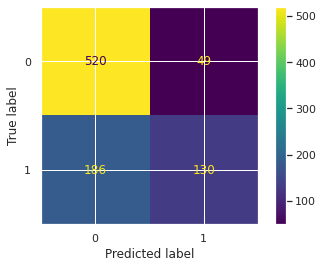

In [272]:
plot_confusion_matrix(KNN, xtest, ytest)
plt.show()

<font color="yellow"><u>**Curva ROC - KNN**</u></font>

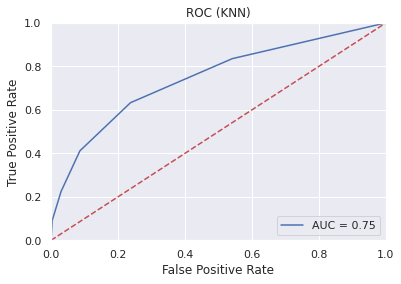

In [273]:
probs1 = KNN.predict_proba(xtest)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(ytest, preds1)
roc_auc = metrics.auc(fpr1, tpr1)
plt.title('ROC (KNN)')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<font color="BLUE"><u>**Accuracy - KNN**</u></font>

In [274]:
KNN_accuracy= accuracy_score(ytest, ypred)
print("El Accuracy del KNN es", KNN_accuracy*100,"%")

El Accuracy del KNN es 73.44632768361582 %


# REGRESIÓN LINEAL

La intención es saber cuántos Dropout hay, por lo tanto le asignamos el valor de 1 al dropout.

In [275]:
df2 = datasetOriginal
df2 = df2.replace({'Enrolled':0,'Graduate':0, 'Dropout':1})
print("Matriz correlacion")

Matriz correlacion


In [276]:
df2.corr()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,0.093712
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,0.198458
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,-0.070485
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,-0.033676
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,-0.080499
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,0.049379
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,-0.078208
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,0.008346
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657,0.064958
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610,0.018295


Matriz de correlación - Mapa de Calor

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


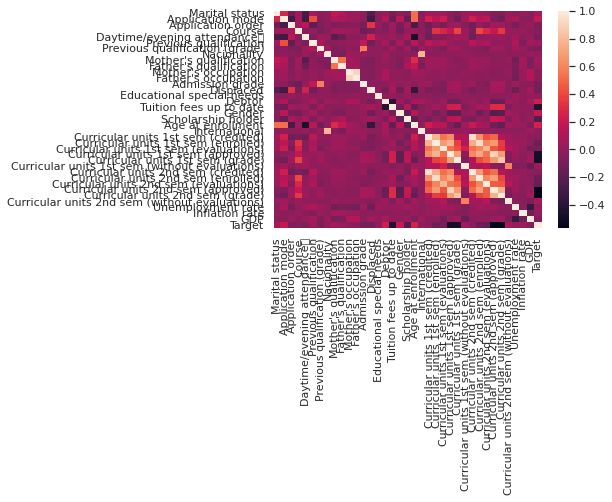

In [277]:
sns.heatmap(df2.corr(), xticklabels=df2.corr().columns, yticklabels=df2.corr().columns)

In [278]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Significancia de las variables a tratar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Text(0.5, 0, 'Importancia')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


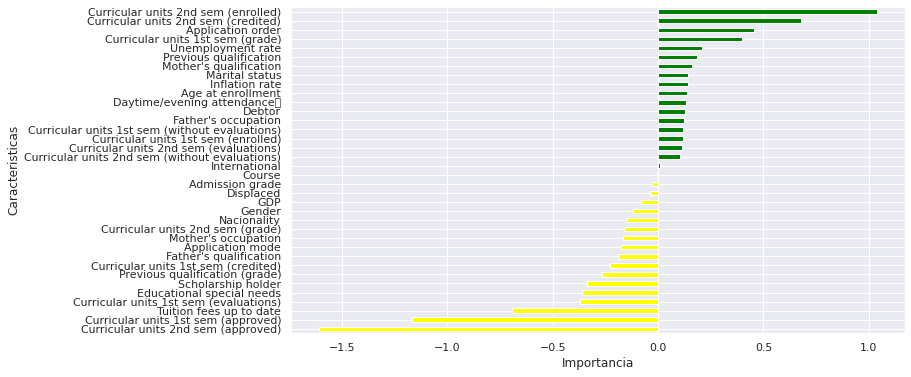

In [279]:
dfTrain = df2[:400]
dfTest = df2[400:500]
dfCheck = df2[500:]

trainLabel = np.asarray(dfTrain['Target'])
trainData = np.asarray(dfTrain.drop('Target',1))
testLabel = np.asarray(dfTest['Target'])
testData = np.asarray(dfTest.drop('Target',1))

means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

coeff = list(diabetesCheck.coef_[0])
labels = list(dfTrain.drop('Target',1).columns)
 
features2 = pd.DataFrame()
features2['Caracteristicas'] = labels
features2['Importancia'] = coeff
features2.sort_values(by=['Importancia'], ascending=True, inplace=True)
features2['positive'] = features2['Importancia'] > 0
features2.set_index('Caracteristicas', inplace=True)
features2.Importancia.plot(kind='barh', figsize=(11, 6),color = features2.positive.map({True: 'green', False: 'yellow'}))
plt.xlabel('Importancia')

<font color="yellow"><u>**Curva ROC - Regresion Lineal**</u></font>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


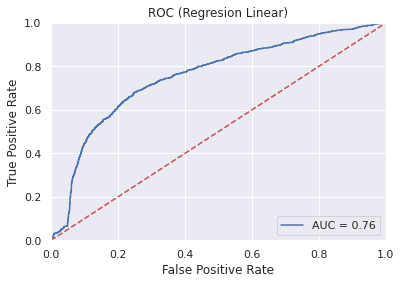

In [280]:
trainCheck = np.asarray(dfCheck.drop('Target',1))
testCheck = np.asarray(dfCheck['Target'])
probs2 = diabetesCheck.predict_proba(trainCheck)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(testCheck, preds2)
roc_auc = metrics.auc(fpr2, tpr2)
plt.title('ROC (Regresion Linear)')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<font color="blue"><u>**Accuracy - Regresion Lineal**</u></font>

In [281]:
RegressionLineal_accuracy= diabetesCheck.score(testData, testLabel)
print("El Accuracy de la Regresion Lineal es", RegressionLineal_accuracy*100,"%")

El Accuracy de la Regresion Lineal es 91.0 %


# ANN

In [282]:
x_training, x_testing, y_training, y_testing = train_test_split(Dataset1_x, Dataset1_y, test_size=0.2, random_state=42)##equivale a particiones
ytrain

array([1, 0, 0, ..., 0, 0, 1])

In [283]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf  
sc=StandardScaler()
x_training=sc.fit_transform(x_training)
x_testing=sc.transform(x_testing)

In [284]:
ann=tf.keras.models.Sequential()

In [285]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [286]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [287]:
ann.fit(x_training, y_training, batch_size=50, epochs=100)

Epoch 1/100
71/71 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.6878
Epoch 2/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.6878
Epoch 3/100
71/71 [==============================] - 0s 2ms/step - loss: 0.5276 - accuracy: 0.6878
Epoch 4/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.6878
Epoch 5/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.6985
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.7895
Epoch 7/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8341
Epoch 8/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8565
Epoch 9/100
71/71 [==============================] - 0s 2ms/step - loss: 0.4049 - accuracy: 0.8598
Epoch 10/100
71/71 [==============================] - 0s 4ms/step - loss: 0.3941 - accuracy: 0.8632
Epoch 11/

In [288]:
y_predicted=ann.predict(x_testing)
y_predicted=(y_predicted>0.5)
y_predicted=y_predicted.astype(int)

MATRIZ DE CONFUSION

In [289]:
ANNmatrizC = confusion_matrix(y_testing, y_predicted)
print("Matriz Confusion")
print(ANNmatrizC)

Matriz Confusion
[[529  40]
 [ 79 237]]


<font color="YELLOW"><u>**CURVA ROC - ANN**</u></font>

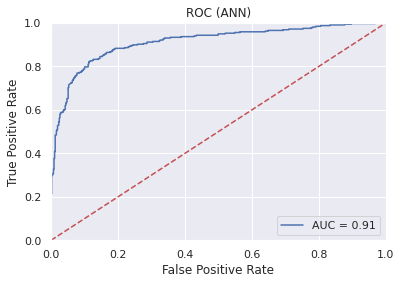

In [290]:
probs3 = ann.predict(x_testing)
preds3 = probs3[:]
fpr3, tpr3, threshold3 = metrics.roc_curve(y_testing, preds3)
roc_auc = metrics.auc(fpr3, tpr3)
plt.title('ROC (ANN)')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<font color="blue"><u>**ACCURACY - ANN**</u></font>

In [291]:
ANN_accuracy=accuracy_score(y_testing,y_predicted)*100
print("El Accuracy de ANN es", ANN_accuracy) 

El Accuracy de ANN es 86.55367231638418


# RESULTADOS

1.   MEJOR RESULTADO DE ACCURACY: <font color="blue"><u>**REGRESION LINEAL**</u></font>  91.0 %
---
2.   MEJOR RASULTADO DE CURVA ROC - AUC: <font color="YELLOW"><u>**ANN**</u></font>  91.0 %
---
3. LA VARIABLE MÁS SIGNIFICATIVA ES: <font color="greem"><u>**"Curricular units 2nd sem(enrrolled)"**</u></font>

